In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/international-airline-passengers.csv')

In [3]:
data.head()

,Month,Count
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
series = data['Count']

In [5]:
#tsa - time series analyses  (анализ временных рядов)
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print('Результат Dickey-Fuller:')
    #autolag='AIC' - критерий помогающий распознать лаги (использует метод наименьших квадратов в своем ядре)
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [6]:
import statsmodels.tsa.api as smt
import matplotlib.pyplot as plt

#визуализация
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

Результат Dickey-Fuller:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


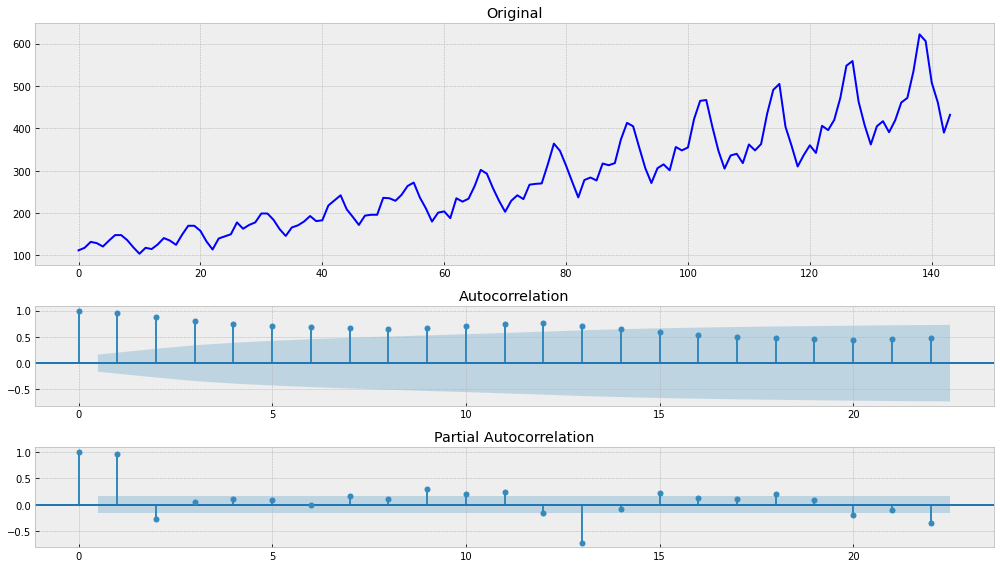

In [7]:
tsplot(series)

1) p-value близко к 1, это значит, что ряд нестационарный (мы не можем отрицать, что наш ряд не содержит единичный корень)
2) автокорреляция имеет большие значения, которые не попадают в наше окно
3) частичная автокорреляция высокая

Как мы видим, и тест Дики-Фуллера и графики коррелограмм не отвергают гипотезу о нестационарности ряда. Ряд нестационарен

**Преобразование Бокса-Кокса (уберем изменение дисперсии)**

In [11]:
series[:10]

array([4.71849887, 4.77068462, 4.88280192, 4.8598124 , 4.79579055,
       4.90527478, 4.99721227, 4.99721227, 4.91265489, 4.77912349])

In [12]:
from scipy.stats import boxcox

series = boxcox(series, 0)
series[:10]

array([1.55149071, 1.56248982, 1.58571922, 1.58099984, 1.56773856,
       1.59031111, 1.60888021, 1.60888021, 1.59181451, 1.56425716])

Результат Dickey-Fuller:
Test Statistic                  -2.156028
p-value                          0.222590
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


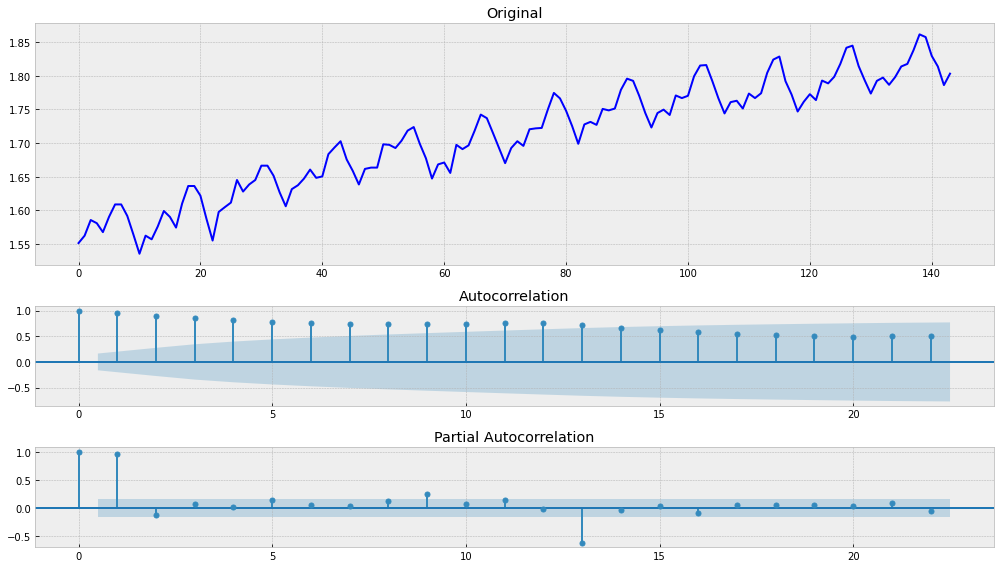

In [13]:
tsplot(series)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [14]:
series[1:][:10]

array([1.56248982, 1.58571922, 1.58099984, 1.56773856, 1.59031111,
       1.60888021, 1.60888021, 1.59181451, 1.56425716, 1.53566023])

In [15]:
series[:-1][:10]

array([1.55149071, 1.56248982, 1.58571922, 1.58099984, 1.56773856,
       1.59031111, 1.60888021, 1.60888021, 1.59181451, 1.56425716])

In [16]:
#вычитаем временной ряд со второго значения до посленего (на 1 значение меньше)
series = series[1:]-series[:-1]
#или np.diff(series, 1) где 1 - на сколько значений назад вычитать
series

array([ 0.01099911,  0.0232294 , -0.00471938, -0.01326127,  0.02257255,
        0.0185691 ,  0.        , -0.01706571, -0.02755735, -0.02859693,
        0.02682959, -0.00541269,  0.0190691 ,  0.02299079, -0.00882591,
       -0.01581383,  0.03572958,  0.02600846,  0.        , -0.01435612,
       -0.03461551, -0.0320289 ,  0.04246295,  0.00707605,  0.00678891,
        0.0335866 , -0.01713497,  0.01049575,  0.00663922,  0.02129347,
        0.        , -0.01491601, -0.02472128, -0.02065164,  0.02543448,
        0.00578835,  0.00992658,  0.01333908, -0.01227279,  0.00211167,
        0.03304232,  0.00990239,  0.00930881, -0.02707206, -0.01700167,
       -0.02015093,  0.02311377,  0.0019451 ,  0.        ,  0.03458138,
       -0.00077747, -0.00474852,  0.01086139,  0.01497681,  0.0053396 ,
       -0.02487823, -0.0214801 , -0.03014056,  0.02102694,  0.00278966,
       -0.0154776 ,  0.04173062, -0.00636419,  0.0055828 ,  0.02187106,
        0.02383126, -0.00531218, -0.02195417, -0.0224031 , -0.02

Результат Dickey-Fuller:
Test Statistic                  -2.501708
p-value                          0.115059
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


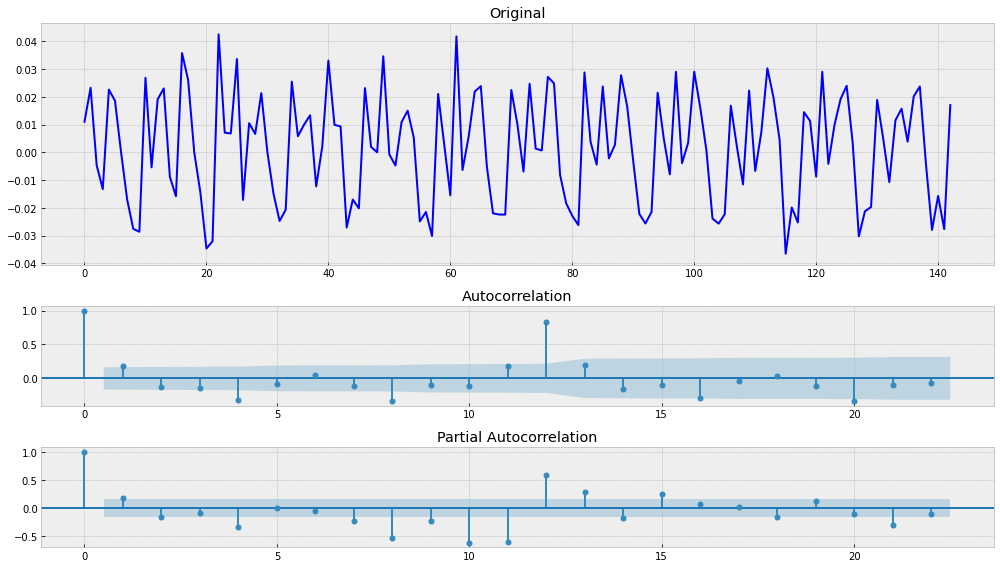

In [17]:
tsplot(series)

Стало еще лучше, но по графику коррелограммы видно сильное влияние сезонности (каждые 12 месяцев). Уберем ее.

In [18]:
#берем значения с 12ого значения и вычитаем 12 предыдущих значений (июнь след года вычитает июнь предыдущего, июль - июль и т.д)
series = series[12:]-series[:-12]

Результат Dickey-Fuller:
Test Statistic                  -4.424645
p-value                          0.000268
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


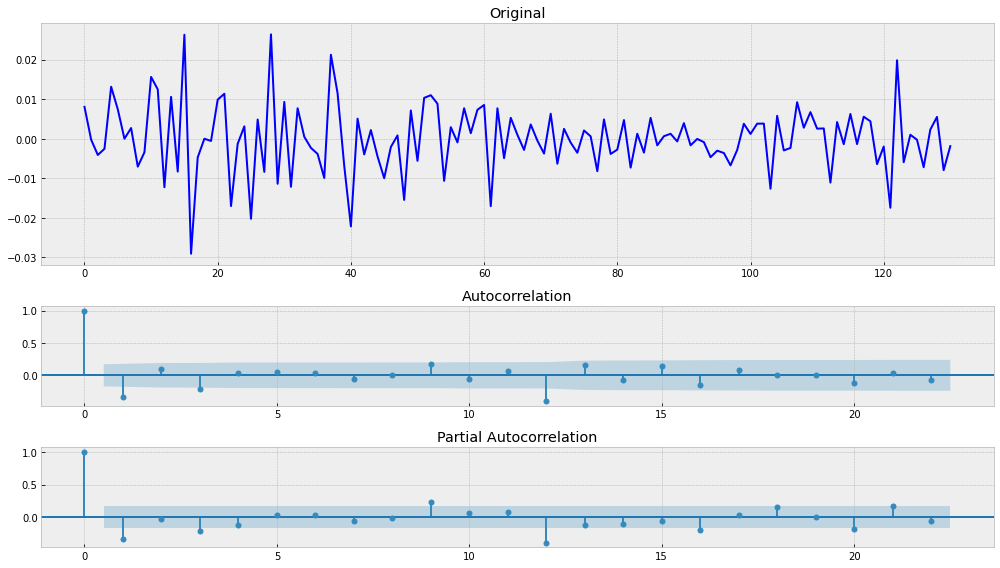

In [19]:
tsplot(series)

Все в пределах маленьких значений. Нет значений близких к единице. Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

**Сетевой трафик**

https://www.kaggle.com/sampadab17/network-intrusion-detection

In [28]:
network = pd.read_csv('data/network/Train_data.csv')

In [29]:
network.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [38]:
print(network.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [36]:
#количество переданных байт
series = network['src_bytes']

Результат Dickey-Fuller:
Test Statistic                  -158.726168
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    25191.000000
Critical Value (1%)               -3.430610
Critical Value (5%)               -2.861655
Critical Value (10%)              -2.566831
dtype: float64


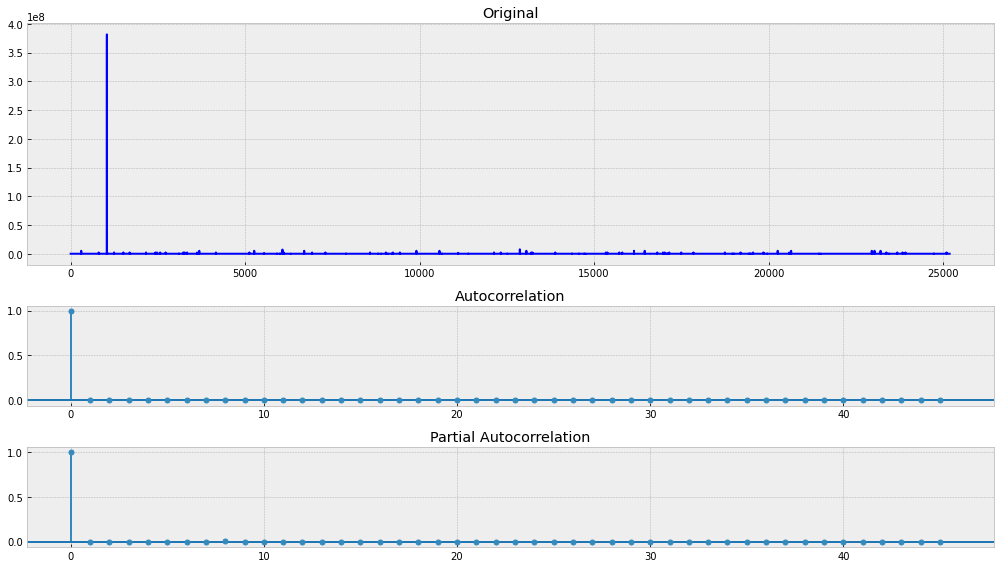

In [37]:
tsplot(series)

Ряд стационарен

Результат Dickey-Fuller:
Test Statistic                  -158.325071
p-value                            0.000000
#Lags Used                         0.000000
Number of Observations Used    25191.000000
Critical Value (1%)               -3.430610
Critical Value (5%)               -2.861655
Critical Value (10%)              -2.566831
dtype: float64


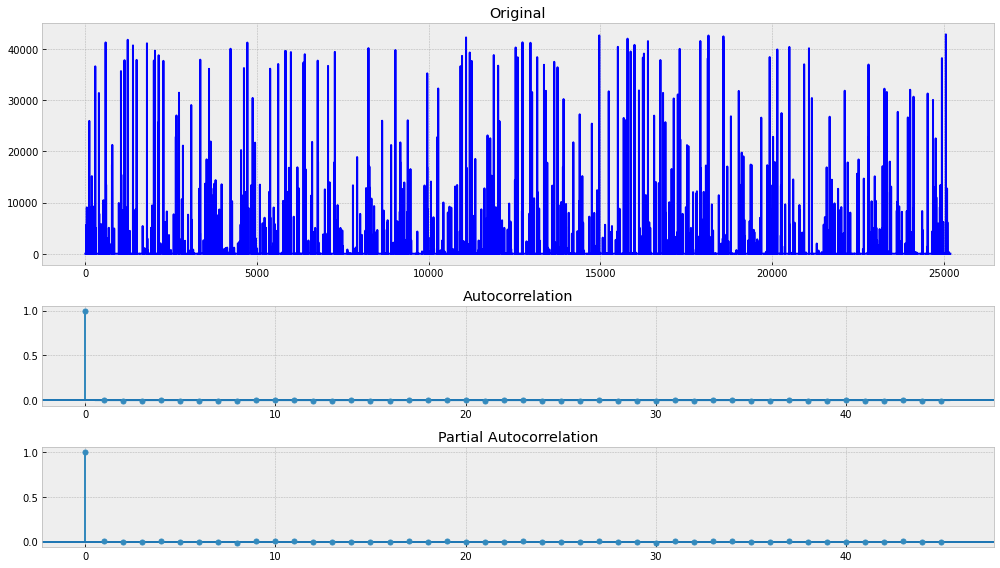

In [44]:
series = network['duration']
tsplot(series)

Ряд стационарен

**Фрактальное броуновское движение**

In [55]:
from fbm import FBM
f = FBM(n=1024, hurst=0.75)
fbm = f.fbm()

Результат Dickey-Fuller:
Test Statistic                    0.479514
p-value                           0.984237
#Lags Used                        5.000000
Number of Observations Used    1019.000000
Critical Value (1%)              -3.436784
Critical Value (5%)              -2.864381
Critical Value (10%)             -2.568282
dtype: float64


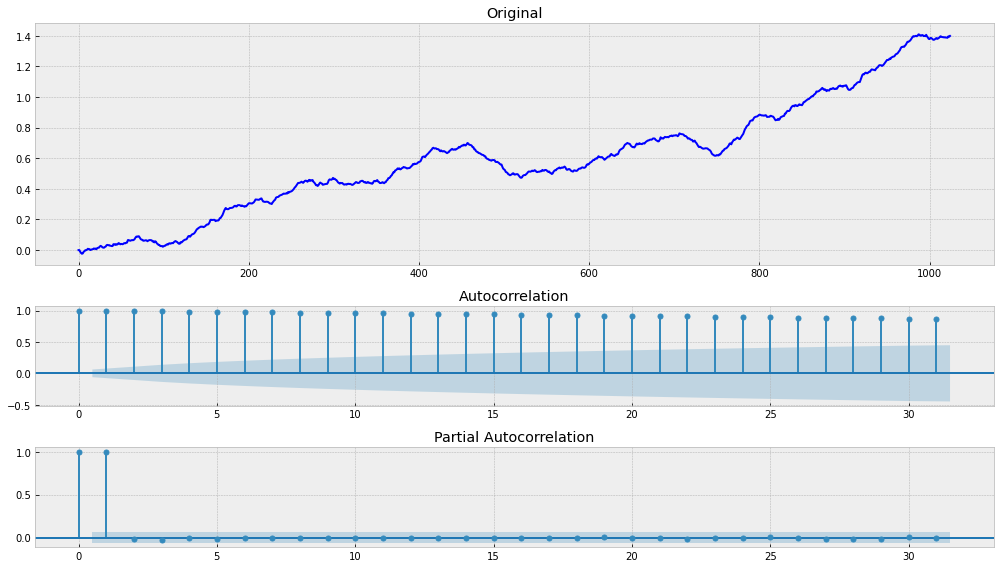

In [56]:
tsplot(fbm)

Ряд нестационарен. p-value близко к 1 (мы не можем отрицать, что наш ряд не содержит единичный корень).
На графике автокорреляции видно, что значение в первом лаге близко к единице, остальные знаечния не входят в доверительный интервал (очень велики). 

**Преобразование Бокса-Кокса (уберем изменение дисперсии)**

In [57]:
fbm

array([ 0.00000000e+00,  3.68644181e-05, -1.12797876e-02, ...,
        1.39585178e+00,  1.39319867e+00,  1.39846992e+00])

In [60]:
fbm = boxcox(fbm[fbm > 0], 0)

Результат Dickey-Fuller:
Test Statistic                  -2.713861
p-value                          0.071670
#Lags Used                      22.000000
Number of Observations Used    993.000000
Critical Value (1%)             -3.436953
Critical Value (5%)             -2.864455
Critical Value (10%)            -2.568322
dtype: float64


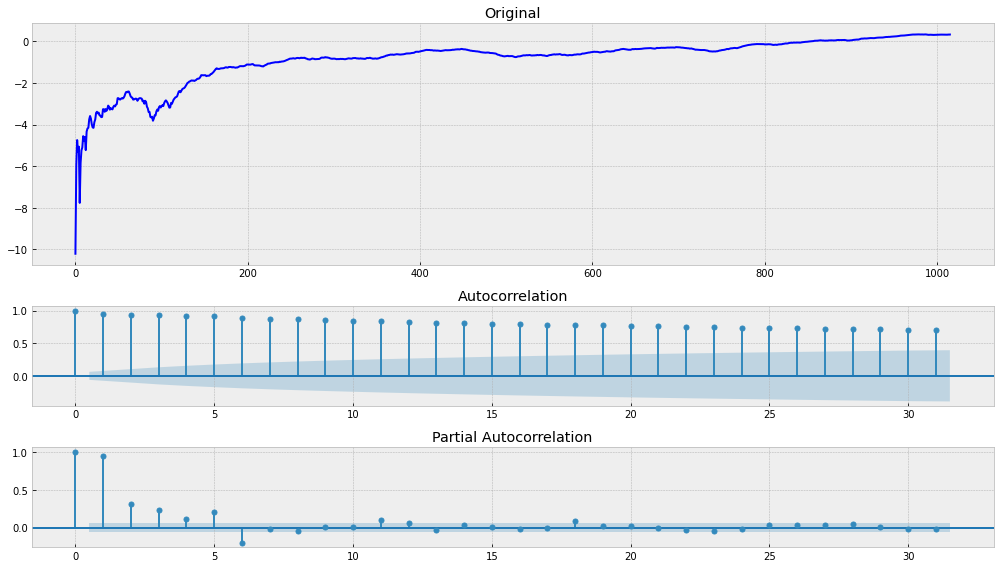

In [61]:
tsplot(fbm)

Нам удалось убрать размах дисперсии, но тест Дикки-Фуллера все еще не отвергает гипотезу о нестационарности ряда. По графику ряда видно наличие сильного тренда. Уберем его дифференцированием.

In [62]:
import numpy as np
fbm = np.diff(fbm, 1)

Результат Dickey-Fuller:
Test Statistic                -7.471622e+00
p-value                        5.037237e-11
#Lags Used                     2.200000e+01
Number of Observations Used    9.920000e+02
Critical Value (1%)           -3.436959e+00
Critical Value (5%)           -2.864458e+00
Critical Value (10%)          -2.568324e+00
dtype: float64


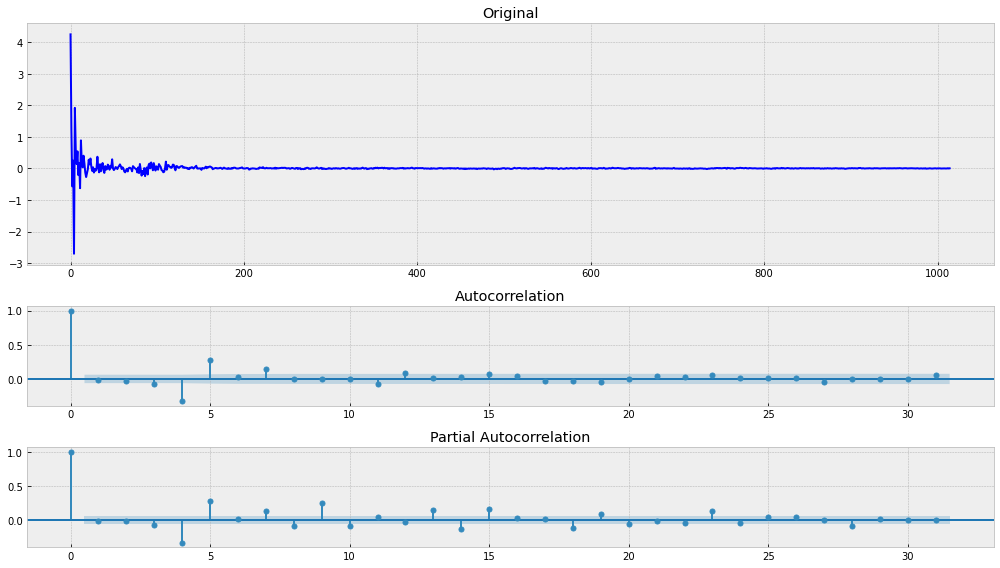

In [63]:
tsplot(fbm)

Все в пределах маленьких значений. Нет значений близких к единице. Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

In [67]:
dftest = adfuller(fbm, autolag='AIC')
#print('adf: ', dftest[0])
#print('p-value: ', dftest[1])
#print('Critical values: ', dftest[4])
if dftest[0]> dftest[4]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')

единичных корней нет, ряд стационарен
